In [1]:
import tensorflow as tf
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
cnn = models.Sequential([
              layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
              layers.MaxPool2D((2,2)),

              layers.Flatten(),
              layers.Dense(64,activation='relu'),
              layers.Dense(10,activation='softmax')
])

In [5]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1685 - accuracy: 0.9501
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0585 - accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0396 - accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0201 - accuracy: 0.9939


In [7]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0550 - accuracy: 0.9833


[0.05498195067048073, 0.983299970626831]

In [8]:
y_pred=cnn.predict(x_test)

In [10]:
y_pr=[np.argmax(element) for element in y_pred]

In [11]:
from sklearn.metrics import classification_report
print('Classification report: \n',classification_report(y_test,y_pr))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.94      0.99      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



The predicted answer is :  4


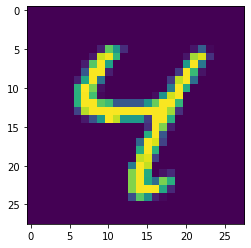

In [12]:
plt.imshow(x_test[6])
print("The predicted answer is : ",y_pr[6])